<h1>Lição 4 - Deep Reinforcement Learning (DRL)</h5

# 1 Introdução <a class="anchor" name="section_1"></a>

O aprendizado por reforço (RL - *Reinforcement Learning*) é um campo de Inteligência Artificial que tenta, através do recebimento de recompensas, ensinar um agente inteligente a decidir ações adequadas para uma determinada situação vivenciada. De maneira intuitiva, o processo é semelhante ao adestramento de um cachorro que aprende a realizar algumas tarefas a partir do recebimento de biscoitos.

### 1.1 Índice <a class="anchor" name="section_1.1"></a>

* [1 Introdução](#section_1)
    * [1.1 Índice](#section_1.1)
    * [1.2 Conceitos Básicos do Reinforcement Learning](#section_1.2)
        * [1.2.1 Ambiente](#section_1.2.1)
        * [1.2.2 Agente](#section_1.2.2)
        * [1.2.3 Estado](#section_1.2.3)
        * [1.2.4 Recompensa](#section_1.2.4)
* [2 Deep Reinforcement Learning (DRL)](#section_2)
    * [2.1 Redefinição do problema](#section_2.1)
    * [2.2 Definição matemática](#section_2.2)
    * [2.3 Deep Q-Learning - DQL](#section_2.3)
    * [2.4 Equação de Bellman](#section_2.4)
    * [2.5 Processo de aprendizagem](#section_2.5)
        * [2.5.1 Estratégias de treinamento](#section_2.5.1)
        * [2.5.1.1 Memória para treinamento (Replay memory)](#section_2.5.1.1)
        * [2.5.1.2 Mecanismo de exploração (exploration/exploitation)](#section_2.5.1.2)
        * [2.5.1.3 Utilização de redes auxiliares(target e policy net)](#section_2.5.1.3)
* [3 Problema CartPole](#section_3)
    * [3.1 Definições dos paradigmas da rede](#section_3.1)
* [4  Implementação](#section_4)
    * [4.1 Ambiente GYM](#section_4.1)
        * [4.1.1 Inicio do ambiente](#section_4.1.1)
        * [4.1.2 Importações](#section_4.1.2)
        * [4.1.3 Configuração do matplotlib e do uso de CUDA](#section_4.1.3)
        * [4.1.4 Método replayMemory](#section_4.1.4)
    * [4.2 Implementação de uma DQN usando o GYM e o problema do cart pole](#section_4.2)
        * [4.2.1 Instanciamento da rede neural](#section_4.2.1)
        * [4.2.2 Implementação do método target policy](#section_4.2.2)
        * [4.2.3 Definição dos hiper parâmetros](#section_4.2.3)
        * [4.2.4 Método exploration e explotation](#section_4.2.4)
        * [4.2.5 Função de treinamento](#section_4.2.5)
        * [4.2.6 Etapa de treinamento](#section_4.2.6)
    * [4.3 Feedback do treinamento](#section_4.3)
* [5 Sugestões](#section_5)
    

## 1.2 Conceitos Básicos do Reinforcement Learning<a class="anchor" name="section_1.2"></a>

Existem alguns conceitos chave para o RL que servirão como base para a maioria dos algoritmos da área, de forma que é fundamental conhecê-los para conseguir compreender as aplicações desse campo. São eles:

*   Ambiente;
*   Agente;
*   Estado; e
*   Recompensa.

Destacaremos cada um nas seções a seguir. Para simplificar o entendimento, explicaremos cada conceito aplicado a um problema mais lúdico, que é um algoritmo que consiga jogar o clássico *game* Mário Bros, desenvolvido na década de 90. Não entraremos no código para essa aplicação, pois não é o foco, mas ela nps será útil para facilitar o aprendizado.

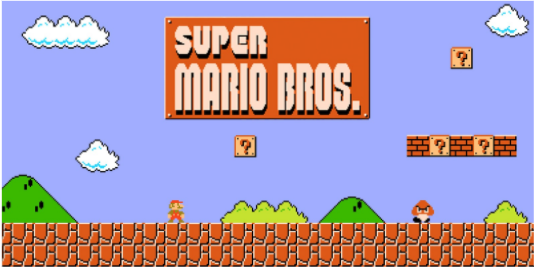

#### 1.2.1 Ambiente <a class="anchor" name="section_1.2.1"></a>

O ambiente é a representação do problema que será utilizada para permitir que um algoritmo de *Deep Reinforcement Learning* aprenda a tomar decisões baseadas no estado em que o ambiente se encontra. Esse elemento é responsável por modelar a transição de estados, ou seja, como a ação realizada modifica o ambiente como um todo. 

Para o exemplo que adotamos, o ambiente é o jogo como um todo, os objetos, espaços, inimigos e toda modelagem.

#### 1.2.2 Agente <a class="anchor" name="section_1.2.2"></a>

O agente é um algoritmo inteligente capaz de compreender o estado em que o ambiente se encontra e, a partir disso, decidir quais ações executadas gerarão recompensas altas. 

Assim, o papel do agente é aprimorar a sua política de decisão de ações baseada no estado, visando sempre encontrar a política que lhe traga o máximo retorno possível, sendo este a soma das recompensas recebidas. A política do agente é denotada como $\mu$.

No exemplo adotado, o agente faria o papel que o ser humano faz ao jogar o *game*, decidindo quais ações devem ser executadas pelo personagem.

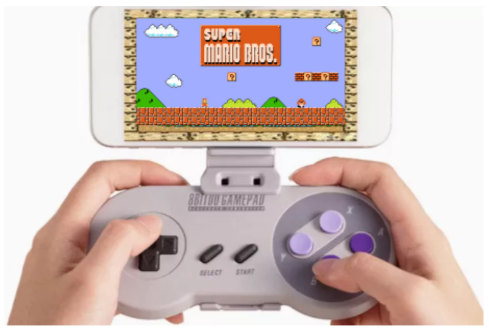


#### 1.2.3 Estado <a class="anchor" name="section_1.2.3"></a>

O estado, denotado como $s$, é definido como a situação do ambiente em determinado instante, ou seja, como o ambiente se encontra no momento da observação feita. A representação do estado faz parte da modelagem do ambiente, já que um único problema apresenta diferentes maneiras de modelagem do vetor que representa o estado, de forma que é necessário decidir qual dessas maneiras é a mais adequada para o entendimento do agente.

Como citado, não existe apenas uma modelagem do estado, mas podemos defini-lo no problema como a imagem que aparece na tela do monitor, já que é isso que o nosso cérebro utiliza para interpretar o ambiente e fazer as decisões.

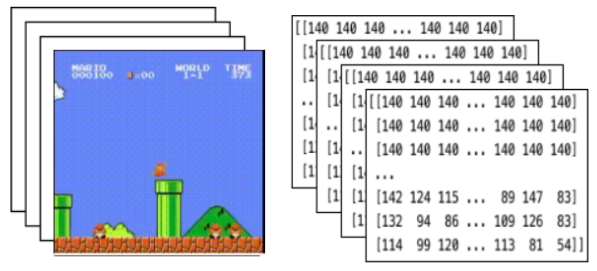

#### 1.2.4 Recompensa <a class="anchor" name="section_1.2.4"></a>

A recompensa é a variável responsável por avaliar o quão positiva ou negativa foi uma determinada ação executada. A partir dessa grandeza é possível ensinar a rede a decidir as ações que serão tomadas, visando sempre maximizar o retorno recebido.

Essa variável, denotada por $r$, é, geralmente, um número real, cujo valor é definido pelas chamadas funções de recompensa, que são funções responsáveis por calcular a recompensa da ação executada a partir de padrões definidos na modelagem do ambiente.

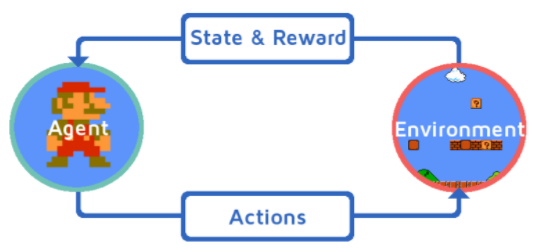

Apresentados os conceitos básicos de RL, precisamos entender o que é o *Deep Reinforcement Learning*.

# 2 Deep Reinforcement Learning (DRL) <a class="anchor" name="section_2"></a>

O DRL é uma consequência de toda teoria de RL desenvolvida ao longo de anos. Em 2013, [Volodymyr Mnih propõe utilizar uma rede neural profunda como agente de um problema de RL](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf), que até então tentava modelar os agentes utilizando, principalmente, modelos estatísticos. A aplicação do artigo, inclusive, era produzir um agente capaz de jogar *games* clássicos do console Atari.

Dessa forma, o DRL surge da ideia de se incorporar o *Deep Learning* em problemas de *Reinforcement Learning*, visando resolver problemas de complexidade elevada. A partir dessa união, precisamos entender como a rede neural aprenderá a tomar decisões a partir de um estado do ambiente. 

## 2.1 Redefinição do problema <a class="anchor" name="section_2.1"></a>

A partir das últimas seções, nós já entendemos que o agente aprenderá a decidir as ações a partir das recompensas que ele obtiver, de maneira que recompensas altas recebidas após uma ação encorajará o agente a realizar ações parecidas quando ele estiver em estados semelhantes. Caso contrário, o agente entenderá que é preciso evitar determinadas ações em determinados estados.

Entretanto, problemas de DRL geralmente não são tão simples. Veja a figura abaixo.

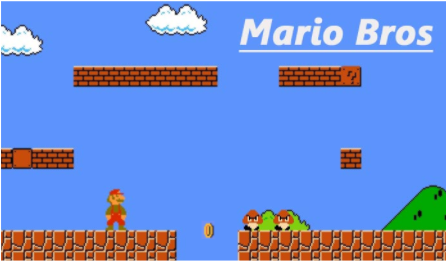

Supondo que o objetivo principal do agente do *game* seja completar a fase do jogo, mas sabendo que a coleta de moedas também lhe traz um valor adicional de recompensa, qual seria a ação que traria maior recompensa para o personagem?

Analisando o estado, provavelmente essa ação seria andar para a frente e coletar a moeda. Entretanto, em poucos instantes após realizar essa ação, o personagem cairia no buraco e reiniciaria a fase, recebendo uma recompensa bastante negativa.

Com esse exemplo, percebemos claramente que não precisamos de um agente que seja capaz de maximizar a recompensa de cada ação tomada, nós precisamos de um algoritmo capaz de **maximizar o retorno $R_t$**. 

## 2.2 Definição matemática <a class="anchor" name="section_2.2"></a>
Antes de definir matematicamente o retorno precisamos entender dois conceitos:

*   **Evento:** é cada instante de tempo em que o agente lê  a entrada e toma uma ação;
*   **Episódio:** é o conjunto de eventos que ocorrem em uma existência do agente, seja ela longa ou curta, exitosa ou falha. No nosso exemplo, um episódio seria o conjunto de todos os eventos, desde o início da fase até o reinício, seja porque o personagem morreu, seja porque a fase foi completada.

Entendido esses dois conceitos, podemos definir o retorno:

$$ R_t = \sum_{k=t}^{T} r_k $$

em que $t$ é o evento do episódio, $T$ é o número de eventos contidos em um episódio e $r_k$ é a recompensa recebida no evento $k$, que por sua vez é o índice que vai de $t$ até o final do episódio $T$. Repare que o retorno é denotado levando em consideração o evento $t$, já que o somatório que o define depende do evento em que este é calculado, de forma que calcular o retorno no primeiro evento ($R_0$) é diferente de calculá-lo em um evento $t$ futuro ($R_t$).

Entendido o papel do agente de maximizar o retorno, precisamos pensar em como ele aprenderá isso. 

A partir do exemplo mostrado, fica claro que precisamos de um agente que consiga prever situações futuras, isto é, voltando à última imagem, precisamos de um agente que compreenda que apesar de não ser a ação que maximiza a recompensa, saltar o buraco vai trazer ao agente a possibilidade de receber mais recompensas no futuro, maximizando o retorno. 

Pense que, ao tomar essa ação, o personagem vai para outro estado, de onde ele pode traçar diferentes trajetórias e não uma única, como mostrado na figura abaixo.

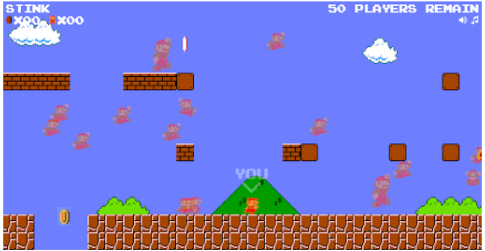

Sendo assim, para que o agente consiga decidir quais ações devem ser tomadas, ele precisa, estando em um determinado estado, conseguir identificar a ação que o levará para um estado em que a média de retorno de todas as trajetórias possíveis é máxima. Essa média de retornos possíveis define uma variável chamada **Valor do estado-ação $Q(s,a)$**, que é matematicamente expressa como:

$$ Q(s,a) = \mathbb{E}_{\mu}[R_t|s_t=s, a_t=a] $$

em que $\mu$ é a política que o agente usa para definir as ações a serem tomadas e $\mathbb{E}$ é o cálculo da esperança dos retornos de todas as possíveis trajetórias a partir do momento que o agente toma a ação $a$ no estado $s$.

Entretanto, pense no número de possibilidades que se abrem a partir do momento em que o personagem pula o buraco. O número de combinações de ações possíveis é enorme, de forma que é impossível que o algoritmo simule cada uma dessas possibilidades em tempo hábil para calcular $Q(s,a)$ com precisão e, então, definir qual ação deve ser tomada.

É a partir dessa dificuldade que nasce a ideia de se introduzir uma rede neural que consiga **estimar** a variável $Q(s,a)$ com precisão razoável, de forma que seja possível, estando em um estado $s$, estimar a variável $Q(s,a)$ para as diferentes ações possíveis, e assim, escolher a ação cuja estimativa de retorno seja máxima.


## 2.3 Deep Q-Learning - DQL <a class="anchor" name="section_2.3"></a>

A *Deep Q-Network* foi a primeira arquitetura de DRL, sendo precursora de quase todas as outras que surgiram posteriormente. Ela funciona utilizando exatamente o que foi explicado na seção anterior. A imagem abaixo ilustra o seu funcionamento.

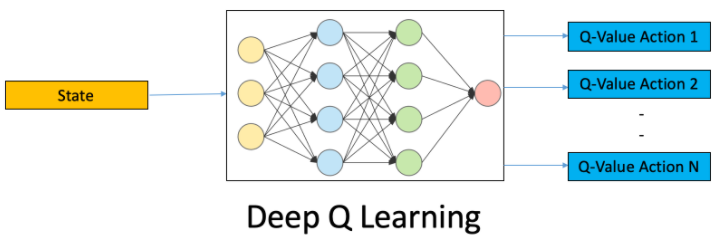

Podemos ver na imagem que o agente é uma DNN que observa o estado $s$ do ambiente e calcula o valor de $Q$ para as $N$ ações possíveis. Trazendo para o exemplo tratado, as $N$ ações seriam as possibilidades que o personagem tem, como correr, pular, ir para frente ou para trás e etc..

O algorítmo de deep Q learning utilizado para resolver o jogo do Atari recebia cada frame e passava por uma rede convolucional, a saída dessa rede é a entrada da rede DQN que retornava a melhor ação a ser tomada naquele momento.

A partir do que foi exposto acima, já seria possível elaborar um algoritmo que conseguisse decidir quais ações devem ser tomadas pelo personagem do jogo. 

## 2.4 Equação de Bellman <a class="anchor" name="section_2.4"></a>

Para compreender o aprendizado da rede, voltaremos à definição da variável $Q(s,a)$. Repare que utilizando as propriedades de um somatório, podemos escrever o retorno como:

$$ R_t = r_t + \sum_{k=t+1}^{T} r_k \\
   R_t = r_t + R_{t+1}
 $$

Nos próximos passos, não entraremos na matemática da dedução por acreditar que o seu entendimento demanda um pouco mais de tempo, mas deixamos uma [referência](https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html) que faz essa dedução completa.

Para nós, o importante é compreendermos a noção de que o retorno presente pode ser decomposto na soma entre a recompensa atual e o retorno calculado no próximo evento. A partir disso, podemos estender a mesma ideia para o valor do estado-ação, por ser uma variável em função do retorno. 

$$ Q(s,a) = r_t + Q(s',a') $$

em que $s'$ é o estado futuro (no evento $t+1$) e $a'$ é a ação tomada no evento $t+1$. Entretanto, em um cenário em que tanto a transição de estados, quanto a tomada de decisão não são conhecidas, é necessário tratarmos com as **esperanças** dessas variáveis. Assim:

$$ Q(s,a) = \mathbb{E}_{s'\mathtt{\sim}P}\{r_t + \mathbb{E}_{a'\mathtt{\sim}\mu}[Q(s',a')]\} $$

em que $P$ é a probabilidade de transição dos estados e $\mu$ é a política para tomada de decisão adotada pelo ator. Essa última equação é conhecida como **Equação de Bellman**, e é a base para o aprendizado de quase todas as arquiteturas de DRL. 

Na maioria das referências, veremos um termo $\gamma$ multiplicando a esperança de $Q(s',a')$, chamado de fator de desconto. Essa variável serve para o algoritmo dar mais importância às experiências recentes, em detrimento das que estão em um futuro mais distante. Nessa explicação, ele foi suprimido para simplificação.

Vejamos, agora, como podemos utilizar essa equação para ensinar a rede neural.


## 2.5 Processo de aprendizagem <a class="anchor" name="section_2.5"></a>

Pensemos no início do treinamento do algoritmo: a rede neural faz uma estimativa para o valor de $Q$, mas por ainda não estar treinada, essa estimativa não é confiável. Nesse sentido, o que precisaríamos fazer para a rede aprender a melhorar essa estimativa? Qual seria o valor esperado que utilizaríamos para calcular o custo que seria usado no otimizador da rede?

Voltemos à Equação de Bellman. Repare que, se a nossa forma de calcular o $Q$ é a partir de uma rede neural, precisaríamos usá-la para calcular ambos os lados da equação:

*    No primeiro, passaríamos à rede o estado e ação atuais ($s$ e $a$) como entrada e receberíamos a estimativa de $Q(s,a)$ como saída;
*    No segundo, passaríamos à rede o estado e ação futuras ($s'$ e $a'$) como entrada e receberíamos a estimativa de $Q(s',a')$ como saída.

Para completar a equação, precisaríamos, ao executar a ação $a$ no estado $s$, coletar $r_t$, que é calculada de maneira determinística pelo próprio ambiente e enviada para o algoritmo.

Apesar de a equação de Bellman ser matematicamente bem definida, de forma que os dois lados da equação precisem ser iguais, ao utilizar uma rede neural para o cálculo do $Q$, estamos realizando apenas uma estimativa para essa variável, de forma que, na prática, haverá divergência entre os dois lados da equação.

Mas como podemos usar tudo isso para ensinar uma rede totalmente leiga a aprender a estimar o valor de $Q$? 

Pense que os dois lados da equação de Bellman possuem grandes incertezas por serem calculados a partir da estimativa de uma rede neural não treinada. Entretanto, como foi dito, $r_t$ é uma variável coletada diretamente do ambiente, **não havendo incerteza alguma em seu valor**. Assim, graças a esse fato, podemos dizer que o cálculo do lado direito da equação de Bellman possui **menos incerteza** do que o lado esquerdo da equação, que depende apenas da saída da rede.

Dessa forma, é possível treinar a rede neural utilizando uma função de custo que calcule a diferença entre $Q(s,a)$ o lado direito da equação, tratando-os como estimativa (*predict*) e valor esperado (*label*), respectivamente.

Perceba que o valor esperado para treinar a rede depende da saída da própria rede, algo que é inesperado e contraintuitivo, mas pouco a pouco os valores de recompensa recebidos vão direcionando a rede para a convergência, de forma que as estimativas vão melhorando a cada época de treinamento.

O fato apontado acima é o principal responsável pelas redes de DRL serem mais instáveis e possuírem convergência mais lenta do que as redes de ML/DL tradicionais, o que faz com que essas arquiteturas precisem ter um treinamento mais longo, além de usarem diversas técnicas para ajudar na convergência do aprendizado.

### 2.5.1 Estratégias de treinamento <a class="anchor" name="section_2.5.1"></a>

Como foi dito, o treinamento das arquiteturas de DRL é um processo instável e, por isso, adotam-se algumas técnicas para tentar diminuir essa instabilidade. Essa seção se propõe a apresentar brevemente algumas dessas técnicas, mesmo que de forma superficial, encorajando que o aluno pesquise mais a fundo futuramente.

#### 2.5.1.1 Memória para treinamento (Replay memory) <a class="anchor" name="section_2.5.1.1"></a>

A despeito do processo mostrado acima, percebeu-se que atualizar os pesos da rede a cada evento causava instabilidade no processo de treinamento.

Percebendo isso, alguns autores propuseram a utilização de uma memória que armazenasse as experiências vividas pelo algoritmo, de onde seria escolhido aleatoriamente um conjunto de experiências para atualizar os parâmetros das redes (*batch*). Perceba que o treinamento em *batchs* utiliza diferentes experiências ao mesmo tempo.

Esse [artigo](https://arxiv.org/pdf/1710.06574.pdf) discute os efeitos da utilização dessa memória de maneira mais profunda, para aqueles que se interessarem.

#### 2.5.1.2 Mecanismo de exploração (exploration/exploitation) <a class="anchor" name="section_2.5.1.2"></a>

Muitos algoritmos de DRL conseguem encontrar uma boa política de tomada de decisão, estimulando a rede a continuar tomando ações parecidas, o que ajuda na sua convergência.

Entretanto, essa pode não ser a **política ótima**, de forma que há como melhorar o desempenho da rede, mas, pelo fato de receber recompensas relativamente altas, a rede não modifica seus parâmetros, continuando estagnada em uma política medíocre.

Uma maneira de se evitar isso é utilizando um mecanismo de exploração. Basicamente, a ideia por trás dessa técnica é, durante o processo de treinamento, introduzir aleatoriedade na tomada de decisão, forçando o agente a tomar uma decisão que não foi planejada pela rede neural.

Em problemas com ações discretas, é possível fazer isso escolhendo algumas ações de maneira aleatória. Entretanto, recentemente surgiu uma nova abordagem para essa exploração. Propôs-se que, em vez de adicionar o mecanismo de exploração após o funcionamento da rede, seria possível adicionar esse mecanismo **durante** a atuação da rede neural.

A ideia é que nós adicionemos um ruído aleatório nos parâmetros da rede, alterando todos os pesos desta. Essa aleatoriedade garante que a rede tome ações diferentes mesmo em situações parecidas, trazendo a ideia de exploração. Essa [tese de mestrado](https://matthiasplappert.com/publications/2017_Plappert_Master-thesis.pdf) abordou o assunto de forma bastante simples e completa. 

#### 2.5.1.3 Utilização de redes auxiliares(target e policy net) <a class="anchor" name="section_2.5.1.3"></a>

Os autores perceberam que atualizar completamente as redes a cada *batch* de experiências traria grandes mudanças na politica a cada evento, o que poderia causar instabilidade no processo de aprendizagem.

Uma proposta para solucionar isso foi utilizar redes auxiliares, denominadas redes *targets*, que são redes atualizadas a cada evento, mas de maneira suavizada, evitando mudanças bruscas nos seus parâmetros. Isso faz com que as estimativas dessa rede se tornem mais "confiáveis" e mais estáveis.

Sabendo disso, o processo de aprendizagem se utiliza dessas redes para calcular o lado direito da equação de Bellman, diminuindo a instabilidade do processo de treinamento do algoritmo.

Essa [publicação](https://towardsdatascience.com/deep-deterministic-policy-gradients-explained-2d94655a9b7b) também trata das redes *target*.

# 3 - Problema CartPole <a class="anchor" name="section_3"></a>

Um dos desafios propostos à comunidade de DRL é o pequeno jogo CartPole, que consiste em uma haste que é posicionada em cima de um carrinho que pode se mover horizontalmente. O objetivo do jogo é equilibrar a haste movendo o carrinho, caso o jogador não execute nenhuma ação a haste cairá por efeito da gravidade.

O sistema tem duas opções de ação, se mover para a esquerda ou direita.

A recompensa do episódio será igual a cada evento em que a haste não cair, o episódio terminará se o carrinho se mover longe demais do centro ou se a haste tombar 15 graus.

![](imagens/cart_pole.png)

Nesse documento nós iremos implementar uma DQN que resolva o problema do CartPole

## 3.1 - Definições dos paradigmas da rede <a class="anchor" name="section_3.1"></a>
No problema do CartPole podemos definir que:

- Estado: posição em que está o carrinho e a haste.
- Ações: mover-se para a direita ou esquerda.
- Objetivo e recompensa: Equilibrar a haste pelo maior tempo possível, fazendo com que o retorno seja o maior possível.

# 4 - Implementação <a class="anchor" name="section_4"></a>

Nota: pela alta simplicidade do algoritmo de DQN nem sempre a rede irá convergir

## 4.1 Ambiente GYM <a class="anchor" name="section_4.1"></a>

### 4.1.1 Inicio do ambiente <a class="anchor" name="section_4.1.1"></a>
<a href="https://gym.openai.com/envs/CartPole-v0/">Mais sobre o GYM</a>

In [1]:
#Importar a biblioteca GYM para usar o ambiente GYM
import gym

#Atribuir ambiente do cartPole a uma variável
env = gym.make('CartPole-v0').unwrapped

### 4.1.2 Importações <a class="anchor" name="section_4.1.2"></a>

In [2]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#collections: Biblioteca de estruturas de dados
#namedtuple: Biblioteca para usar dicionários imutáveis
#deque: Biblioteca para usar listas encadeadas duplas
from collections import namedtuple, deque

#itertools: Criar iteradores mais eficientes
from itertools import count

#PIL: Biblioteca para ler e manipular imagens no python
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

### 4.1.3 Configuração do matplotlib e do uso de CUDA <a class="anchor" name="section_4.1.3"></a>

In [3]:
#Iniciar matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

#Checar se uma GPU está disponível 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### 4.1.4 Método replayMemory <a class="anchor" name="section_4.1.4"></a>

In [4]:
# Criar uma tupla de transições 
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

# Definir método replay memory
class ReplayMemory(object):
    
    # Definir contrutor para repaly memory
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0
        
    # Adicionar informações na memoría caso tenha espaço
    def push(self, *args):
        # Salvar uma transição na memória
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    # Pegar amostra aleatória de memória
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    # Retornar a quantidade de elementos na memória
    def __len__(self):
        return len(self.memory)

## 4.2. Implementação de uma DQN usando o GYM e o problema do cart pole <a class="anchor" name="section_4.2"></a>

### 4.2.1 Instanciamento da rede neural <a class="anchor" name="section_4.2.1"></a>

In [5]:
# Definir rede neural DQN com 3 camadas
class DQN(nn.Module):
    
    # Cadastrar uma rede neural com :
    # 1 input layer, 1 hidden layer e 1 output layer
    def __init__(self):
        nn.Module.__init__(self)
        self.l1 = nn.Linear(4, 64)
        self.l2 = nn.Linear(64, 128)
        self.l3 = nn.Linear(128, 2)
    
    # Utilizar o método de ativação reLU nas 2 primeiras camadas
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x


### 4.2.2 Implementação do método target policy <a class="anchor" name="section_4.2.2"></a>

In [6]:
### Preparar as redes neurais ###
policy_net = DQN().to(device)
target_net = DQN().to(device)

### 4.2.3 Definição dos hiper parâmetros <a class="anchor" name="section_4.2.3"></a>

In [7]:
BATCH_SIZE = 64  # Tamanho do batch
GAMMA = 0.9  # Taxa de aprendizado
TARGET_UPDATE = 5  # Episódios de atualização das redes target

### Parâmetros de exploração ###
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 100

# loss function será a SmoothL1Loss com beta igual a 1
criterion = nn.SmoothL1Loss()

# Pegar os pesos da policy net e colocar na target net 
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

# Definir o otimizador
optimizer = optim.Adam(policy_net.parameters(), lr=0.001)

# Instanciar a memória
memory = ReplayMemory(10000)  

### 4.2.4 Método exploration e explotation <a class="anchor" name="section_4.2.4"></a>

In [8]:
# Implementar as técnicas de exploration e explotation
def select_action(state, train=True):
    
    #Função que deverá selecionar a ação que será realizada
    
    global i_episode

    sample = random.random()  # Amostra de um número racional entre 0 e 1
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * i_episode /
                 EPS_DECAY)  # Definir a probabilidade de explorar no i_episode
    tensor_state = torch.autograd.Variable(state).type(
        torch.FloatTensor).to(device)  # ajustar o formato do estado

    if train:
        if sample > eps_threshold:  # Explotar
            with torch.no_grad():
                return policy_net(tensor_state).data.max(1)[1].view(1, 1).to(device)
        else:  # Explorar
            return torch.LongTensor([[random.randrange(2)]]).to(device)

    else:
        with torch.no_grad():
            return policy_net(tensor_state).data.max(1)[1].view(1, 1).to(device)

### 4.2.5 Função de treinamento <a class="anchor" name="section_4.2.5"></a>

In [9]:
# Função que deverá treinar o modelo
def optimize_model():
    
    #Função que será utilizada para aprendizado das redes neurais

    if len(memory) < BATCH_SIZE:  # Verificar se a memória ja tem BATCH_SIZE's amostras
        return

    # Definir que as redes estão em treinamento
    policy_net.train()
    target_net.train()

    # Amostrar a memória em BATCH_SIZE's transições
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))

    # Definir os tensores que serão utilizados no treinamento,
    # agrupando os estados, ações e recompensas de todas as transições
    batch_next_state = torch.autograd.Variable(
        torch.cat(batch.next_state)).to(device)
    state_batch = torch.cat(batch.state).to(device)
    action_batch = torch.cat(batch.action).to(device)
    reward_batch = torch.cat(batch.reward).to(device)

    # Calcular os Q(s,a) a partir dos estados do batch e selecionar aqueles
    # cujas ações foram realizadas e armazenadas no batch
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Calcular os Q(s',a') a partir dos estados futuros do batch
    # e selecionar os de maior valor
    with torch.no_grad():
        next_state_values = target_net(batch_next_state).detach().max(1)[0]

    # Calcular o lado direito da equação de Bellman
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Calcular a diferença entre os dois lados da equação de Bellman
    loss = criterion(state_action_values,
                     expected_state_action_values.unsqueeze(1))

    # Otimizar os parâmetros da rede
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


### 4.2.6 Etapa de treinamento <a class="anchor" name="section_4.2.6"></a>

In [10]:
# Etapa que deverá treinar a rede
num_episodes = 1000

# Listar todos as pontuções que o programa obterá
list_retorno = []
for i_episode in range(num_episodes):
    # Inicializar o ambiente e coletar o estado inicial
    state = env.reset()
    # Inicializar as variáveis de retorno e eventos
    retorno, steps = 0, 0
    # Inicializar a contagem de eventos no episódio
    for t in count():
        env.render()  # Renderizar o ambiente

        action = select_action(torch.FloatTensor([state])).to(
            device)  # Selecionar a ação a partir do estado
        # Executar a ação e salvar respectivamente 
        # o prox estado, a recompensa e se o episódio foi finalizado ou não
        next_state, reward, done, _ = env.step(action[0].item())
        # Somar a recompensa ao retorno
        retorno += reward

        # Apesar da coleta da recompensa acima, irá se recalcular a recompensa de outra maneira,
        # já que o cálculo de recompensa original não é muito eficiente
        if done:
            if steps < 30:
                reward -= 10
            else:
                reward = -1
        if steps > 100:
            reward += 1
        if steps > 200:
            reward += 1
        if steps > 300:
            reward += 1

        # Guardar a experiência na memória
        memory.push(torch.FloatTensor([state]),
                    action,  # action já é um tensor
                    torch.FloatTensor([next_state]),
                    torch.FloatTensor([reward]).to(device))

        # Mover para o proximo estado e atualizar o ponteiro de eventos
        state = next_state
        steps += 1

        # Otimizar a rede neural do crítico
        optimize_model()
        # Finalizar o episódio se tiver perdido ou após 5 mil eventos
        if done or (steps == 2500):
            break

    # Atualizar a rede target
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

    # Imprimir o retorno do episódio e guardar na lista de pontuações
    print(f'Episodio {i_episode}: retorno={round(retorno,2)}')
    list_retorno.append(retorno)

print('Complete')
env.render()
env.close()


Episodio 0: retorno=51.0
Episodio 1: retorno=14.0
Episodio 2: retorno=21.0
Episodio 3: retorno=26.0
Episodio 4: retorno=14.0
Episodio 5: retorno=12.0
Episodio 6: retorno=11.0
Episodio 7: retorno=28.0
Episodio 8: retorno=13.0
Episodio 9: retorno=37.0
Episodio 10: retorno=16.0
Episodio 11: retorno=20.0
Episodio 12: retorno=21.0
Episodio 13: retorno=39.0
Episodio 14: retorno=16.0
Episodio 15: retorno=33.0
Episodio 16: retorno=14.0
Episodio 17: retorno=24.0
Episodio 18: retorno=14.0
Episodio 19: retorno=17.0
Episodio 20: retorno=38.0
Episodio 21: retorno=10.0
Episodio 22: retorno=15.0
Episodio 23: retorno=11.0
Episodio 24: retorno=47.0
Episodio 25: retorno=18.0
Episodio 26: retorno=23.0
Episodio 27: retorno=31.0
Episodio 28: retorno=20.0
Episodio 29: retorno=39.0
Episodio 30: retorno=14.0
Episodio 31: retorno=38.0
Episodio 32: retorno=102.0
Episodio 33: retorno=65.0
Episodio 34: retorno=48.0
Episodio 35: retorno=9.0
Episodio 36: retorno=39.0
Episodio 37: retorno=17.0
Episodio 38: retorno=2

Episodio 302: retorno=217.0
Episodio 303: retorno=191.0
Episodio 304: retorno=206.0
Episodio 305: retorno=223.0
Episodio 306: retorno=229.0
Episodio 307: retorno=96.0
Episodio 308: retorno=242.0
Episodio 309: retorno=211.0
Episodio 310: retorno=239.0
Episodio 311: retorno=209.0
Episodio 312: retorno=195.0
Episodio 313: retorno=222.0
Episodio 314: retorno=215.0
Episodio 315: retorno=109.0
Episodio 316: retorno=111.0
Episodio 317: retorno=213.0
Episodio 318: retorno=299.0
Episodio 319: retorno=254.0
Episodio 320: retorno=115.0
Episodio 321: retorno=127.0
Episodio 322: retorno=495.0
Episodio 323: retorno=256.0
Episodio 324: retorno=24.0
Episodio 325: retorno=241.0
Episodio 326: retorno=287.0
Episodio 327: retorno=247.0
Episodio 328: retorno=266.0
Episodio 329: retorno=243.0
Episodio 330: retorno=24.0
Episodio 331: retorno=249.0
Episodio 332: retorno=279.0
Episodio 333: retorno=115.0
Episodio 334: retorno=323.0
Episodio 335: retorno=13.0
Episodio 336: retorno=278.0
Episodio 337: retorno=17

Episodio 598: retorno=80.0
Episodio 599: retorno=100.0
Episodio 600: retorno=251.0
Episodio 601: retorno=74.0
Episodio 602: retorno=121.0
Episodio 603: retorno=45.0
Episodio 604: retorno=24.0
Episodio 605: retorno=74.0
Episodio 606: retorno=109.0
Episodio 607: retorno=463.0
Episodio 608: retorno=122.0
Episodio 609: retorno=121.0
Episodio 610: retorno=70.0
Episodio 611: retorno=156.0
Episodio 612: retorno=101.0
Episodio 613: retorno=12.0
Episodio 614: retorno=68.0
Episodio 615: retorno=33.0
Episodio 616: retorno=78.0
Episodio 617: retorno=399.0
Episodio 618: retorno=155.0
Episodio 619: retorno=261.0
Episodio 620: retorno=24.0
Episodio 621: retorno=65.0
Episodio 622: retorno=79.0
Episodio 623: retorno=120.0
Episodio 624: retorno=54.0
Episodio 625: retorno=172.0
Episodio 626: retorno=303.0
Episodio 627: retorno=127.0
Episodio 628: retorno=39.0
Episodio 629: retorno=65.0
Episodio 630: retorno=29.0
Episodio 631: retorno=74.0
Episodio 632: retorno=132.0
Episodio 633: retorno=56.0
Episodio 63

Episodio 895: retorno=2500.0
Episodio 896: retorno=2500.0
Episodio 897: retorno=2500.0
Episodio 898: retorno=2500.0
Episodio 899: retorno=2500.0
Episodio 900: retorno=2500.0
Episodio 901: retorno=2500.0
Episodio 902: retorno=682.0
Episodio 903: retorno=1291.0
Episodio 904: retorno=660.0
Episodio 905: retorno=2500.0
Episodio 906: retorno=199.0
Episodio 907: retorno=971.0
Episodio 908: retorno=513.0
Episodio 909: retorno=488.0
Episodio 910: retorno=988.0
Episodio 911: retorno=187.0
Episodio 912: retorno=374.0
Episodio 913: retorno=220.0
Episodio 914: retorno=221.0
Episodio 915: retorno=540.0
Episodio 916: retorno=2500.0
Episodio 917: retorno=2500.0
Episodio 918: retorno=2500.0
Episodio 919: retorno=2051.0
Episodio 920: retorno=166.0
Episodio 921: retorno=725.0
Episodio 922: retorno=278.0
Episodio 923: retorno=128.0
Episodio 924: retorno=193.0
Episodio 925: retorno=2500.0
Episodio 926: retorno=2500.0
Episodio 927: retorno=2500.0
Episodio 928: retorno=2500.0
Episodio 929: retorno=2500.0
Ep

## 4.3 - Feedback do treinamento <a class="anchor" name="section_4.3"></a>

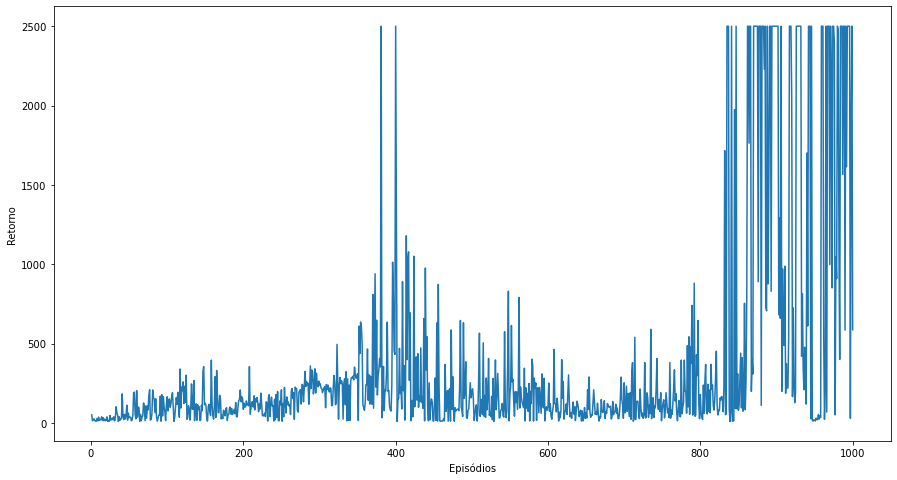

In [11]:
# Plotar o gráfico 
# Eixo x será o número de episódios
# Eixo y será a pontuação
plt.figure(figsize=(15, 8))
plt.plot(range(1, num_episodes+1), list_retorno)
plt.ylabel('Retorno')
plt.xlabel('Episódios')
plt.show() 

# 5 Sugestões <a class="anchor" name="section_5"></a>

1. Altere as camadas da rede do crítico e veja as mudanças causadas.
2. Altere os hiper parâmetros de aprendizado (lr, otimizador e etc.) para ver como a rede reage. 
3. Tente treinar a rede com mais episódios, com isso você conseguirá obter diferentes resultados.
4. Teste a utilização de outros ambientes na rede ,como os disponíveis [aqui](https://gym.openai.com/envs/#classic_control). Atenção, a mudança do ambiente pode fazer com que seja necessário mudar os parâmetros, a rede ou até mesmo a lógica do notebook.